In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve, auc,classification_report

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/INDIAN/Downloads/Test_Data.csv")
df.head()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6,Class
0,0,6,860.62,809.73,919.69,30.87,69.81,65.24,74.10,2.51,...,0.002757,-0.003582,0.000125,0.001961,-3.290000e-08,0.000346,0.000956,9.150000e-07,1.190000e-07,A
1,1,7,871.58,789.74,929.69,32.82,68.94,64.54,75.97,2.65,...,0.002757,-0.002944,0.000131,0.001932,-3.290000e-08,0.000358,0.000888,7.880000e-07,1.280000e-07,A
2,2,6,854.87,789.74,929.69,32.38,70.29,64.54,75.97,2.66,...,0.003168,-0.002944,0.000125,0.001628,-3.290000e-08,0.000339,0.000875,7.660000e-07,1.150000e-07,A
3,3,7,823.73,759.75,879.71,29.19,72.93,68.20,78.97,2.58,...,0.003168,-0.002490,0.000116,0.001572,-3.290000e-08,0.000308,0.000856,7.330000e-07,9.480000e-08,A
4,4,6,823.44,759.75,879.71,28.98,72.96,68.20,78.97,2.56,...,0.003091,-0.002601,0.000126,0.001596,-3.290000e-08,0.000318,0.000913,8.330000e-07,1.010000e-07,A


In [3]:
df=df.drop("Unnamed: 0",axis=1)

there is a unnamed feature in dataset which is a duplicate index so,we can drop it.

In [4]:
# Mapping classes (numberic) column into categorical:
dow = {"A":0, "B":1, "C":2, "D":3 , "E":4, "F":5}

df["Class"] = df["Class"].map(dow)

In [5]:
#Defining dependent and independent

x=df.drop('Class',axis=1)
y=df['Class']

### Feature selection technique

#### 1) using correlation

In [6]:
corr=df.corr()
cor_target=abs(corr['Class'])
imp_features=cor_target[cor_target>=0.5]
imp_features

Class    1.0
Name: Class, dtype: float64

#### no feature has atleast 50% correlation with the target variable

#### 2) recursive feature elimination (RFE)

In [7]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.309361


In [8]:
model = LogisticRegression()

## initialize RFE
rfe=RFE(model,9)
rfe.fit(x,y)

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False  True  True False False False False False False False False
  True  True  True False False False False False False  True False  True
 False False  True  True False]
[ 7 25 28 26 19 13 18 17 11 10 14 21 24 20  1  1 27 31 30  8 16 22 23 15
  1  1  1  3 32  6  5 29  2  1  9  1 33  4  1  1 12]


#### by RFE we can see it showing the highest score i.e,30% can be acheived by 9 features.In this case dimensions are reducing but the model is not learning accurately, so it is better to use dimentionality reduction technique-PCA and capture maximum data with minimum no.of features. 

In [9]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


#### 3)Forward selection

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [11]:
model = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

sfs1=sfs(model,k_features=9,forward=True,scoring='r2',cv=3)
sfs1=sfs1.fit(x_train,y_train)

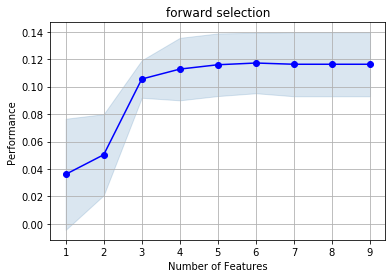

In [12]:
fig=plot_sfs(sfs1.get_metric_dict())          #in forward it shows which are true in graph
plt.title('forward selection')
plt.grid()

In [13]:
sfs1.k_feature_names_

('A', 'C', 'Y1', 'Y3', 'Y8', 'Z1', 'Z4', 'Z5', 'Z6')

#### we can see even forward selection (sequential feature selection) perform very poor .

### DIMENTIONALITY REDUCTION USING PCA

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Step 1: Normalize the data

- First step is to normalize the data that we have so that PCA works properly.
- This is done by subtracting the respective means from the numbers in the respective column.
- So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.

In [15]:
X_std = StandardScaler().fit_transform(x)

## Step 2: Calculate the covariance matrix

In [16]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00017129 -0.489225   -0.43917033 ...  0.0984491   0.04749056
   0.04225471]
 [-0.489225    1.00017129  0.87439685 ... -0.26537743 -0.06508865
  -0.07207115]
 [-0.43917033  0.87439685  1.00017129 ... -0.30246633 -0.08184475
  -0.08488137]
 ...
 [ 0.0984491  -0.26537743 -0.30246633 ...  1.00017129  0.7879122
   0.75117334]
 [ 0.04749056 -0.06508865 -0.08184475 ...  0.7879122   1.00017129
   0.92762088]
 [ 0.04225471 -0.07207115 -0.08488137 ...  0.75117334  0.92762088
   1.00017129]]


## Step 3: Calculate the eigenvalues and eigenvectors

In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [18]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 1.13382303e-01+0.00000000e+00j -5.14606009e-02+0.00000000e+00j
  -6.89898462e-02+0.00000000e+00j ...  6.87385909e-16-1.05492237e-15j
   6.87385909e-16+1.05492237e-15j  0.00000000e+00+0.00000000e+00j]
 [-2.35312311e-01+0.00000000e+00j  1.12377090e-01+0.00000000e+00j
   8.08740888e-02+0.00000000e+00j ...  1.40952606e-14-2.09212078e-14j
   1.40952606e-14+2.09212078e-14j  0.00000000e+00+0.00000000e+00j]
 [-2.30461415e-01+0.00000000e+00j  1.18898701e-02+0.00000000e+00j
   1.87151653e-01+0.00000000e+00j ... -1.66980949e-14+2.82166240e-14j
  -1.66980949e-14-2.82166240e-14j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 2.14433985e-01+0.00000000e+00j  1.65076171e-01+0.00000000e+00j
   1.98373252e-01+0.00000000e+00j ... -1.27231507e-15+1.47601723e-15j
  -1.27231507e-15-1.47601723e-15j  0.00000000e+00+0.00000000e+00j]
 [ 1.35325913e-01+0.00000000e+00j  1.31030596e-01+0.00000000e+00j
   2.52911617e-01+0.00000000e+00j ... -5.28514404e-15+7.31123228e-15j
  -5.28514404e-15-7.31123228e

In [19]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [20]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.96269946+0.00000000e+00j  50.04790128+0.00000000e+00j
  62.11446477+0.00000000e+00j  70.07005052+0.00000000e+00j
  74.32664533+0.00000000e+00j  78.17900593+0.00000000e+00j
  81.39754818+0.00000000e+00j  83.85090375+0.00000000e+00j
  86.06999011+0.00000000e+00j  88.02557312+0.00000000e+00j
  89.71655017+0.00000000e+00j  91.1886474 +0.00000000e+00j
  92.60407796+0.00000000e+00j  93.7001979 +0.00000000e+00j
  94.68175601+0.00000000e+00j  95.59393682+0.00000000e+00j
  96.40818009+0.00000000e+00j  97.09790871+0.00000000e+00j
  97.73056057+0.00000000e+00j  98.19157362+0.00000000e+00j
  98.51157482+0.00000000e+00j  98.81795413+0.00000000e+00j
  99.06864054+0.00000000e+00j  99.30526165+0.00000000e+00j
  99.49962074+0.00000000e+00j  99.64517656+0.00000000e+00j
  99.74571068+0.00000000e+00j  99.8216274 +0.00000000e+00j
  99.87639529+0.00000000e+00j  99.92318376+0.00000000e+00j
  99.94702664+0.00000000e+00j  99.96458788+0.00000000e+00j
  99.97906823+0.00000000e+

### we can see at 16 components we are capturing 95.5% of the data so,further taking 16 features after applying pca

### Applying PCA

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(16)
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [26]:
# variability explained by each variable
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.27932354, 0.22946302, 0.1269896 , 0.07712056, 0.04676104,
       0.032831  , 0.02434242, 0.02301201, 0.02220123, 0.01926934,
       0.01664303, 0.01463371, 0.01252935, 0.01097625, 0.00976616,
       0.00937306])

In [27]:
p_reduce=eig_vecs[:,:16]#last vector dropped due to insignificance
p_reduce

array([[ 1.13382303e-01+0.j, -5.14606009e-02+0.j, -6.89898462e-02+0.j,
         1.85301937e-01+0.j,  1.59904755e-01+0.j,  8.18145425e-02+0.j,
         3.27882276e-01+0.j, -1.21406601e-01+0.j,  1.71430476e-01+0.j,
         6.67402005e-01+0.j,  1.55409981e-01+0.j, -1.51662080e-02+0.j,
         1.70741766e-01+0.j, -1.25841306e-01+0.j, -2.85909523e-01+0.j,
        -2.73554560e-01+0.j],
       [-2.35312311e-01+0.j,  1.12377090e-01+0.j,  8.08740888e-02+0.j,
        -2.45694106e-01+0.j, -3.33505700e-02+0.j, -1.47267313e-02+0.j,
         3.76843760e-02+0.j, -3.15802294e-04+0.j, -9.68977018e-02+0.j,
         4.40498060e-02+0.j, -1.46660323e-02+0.j,  1.16112122e-02+0.j,
         1.04144640e-02+0.j,  9.13593605e-02+0.j, -2.34520336e-02+0.j,
        -3.22168599e-02+0.j],
       [-2.30461415e-01+0.j,  1.18898701e-02+0.j,  1.87151653e-01+0.j,
        -2.30208738e-01+0.j, -9.22491153e-02+0.j, -1.65502907e-02+0.j,
         8.28224074e-02+0.j,  2.85763650e-03+0.j, -5.76866777e-02+0.j,
         9.760978

In [28]:
X_pca=np.dot(x,p_reduce)
X_pca.shape

(5839, 16)

In [29]:
X_PCA=pd.DataFrame(X_pca)
X_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,(-510.5036080362648+0j),(623.9675365093136+0j),(-47.86412652548065+0j),(-388.30648518177827+0j),(-38.265357915580736+0j),(17.67016847625516+0j),(51.85359568657729+0j),(17.11705158264278+0j),(-20.669831678800158+0j),(107.154101653477+0j),(-596.2479025985276+0j),(347.0898070070306+0j),(239.61130432152746+0j),(28.094092796460412+0j),(-116.42717433149139+0j),(-190.16165284724477+0j)
1,(-500.8363051542913+0j),(753.9336905978505+0j),(-153.68732479664467+0j),(-353.5415686634778+0j),(-3.3680338771522136+0j),(44.99816166675219+0j),(42.660156483888784+0j),(28.500004558302+0j),(53.785236683565394+0j),(87.79300591451819+0j),(-773.7709114023339+0j),(442.89837236026+0j),(308.61497160532406+0j),(-45.97745886324871+0j),(-140.87594063931587+0j),(-231.87350576987114+0j)
2,(-505.4172767544455+0j),(688.6636168130588+0j),(-98.72591407631188+0j),(-361.3645366958265+0j),(-21.006656374604166+0j),(29.838129808333342+0j),(45.017688550588936+0j),(22.37305856337711+0j),(16.082747424464273+0j),(97.11475872102869+0j),(-678.6992469815797+0j),(391.03643261783435+0j),(270.1971621870191+0j),(-6.74456257959003+0j),(-126.02397518333291+0j),(-208.05794998936145+0j)
3,(-481.60787511284815+0j),(556.2564519684543+0j),(-21.07379825627842+0j),(-375.73722261446215+0j),(-43.92694233325182+0j),(9.8754782497594+0j),(51.364611951808+0j),(13.206016223721186+0j),(-38.78034619703974+0j),(105.60599671214781+0j),(-513.6672578129636+0j),(301.94397690484936+0j),(207.53698636793638+0j),(49.95466758146051+0j),(-102.95615753890014+0j),(-167.1282661112384+0j)
4,(-484.21828132305984+0j),(534.7269119660041+0j),(-2.519324098199143+0j),(-381.8184379679582+0j),(-50.23708612134294+0j),(4.631162177584004+0j),(53.491573140931514+0j),(11.206793227882201+0j),(-52.39071117553274+0j),(108.84090566954973+0j),(-480.6153911925461+0j),(283.58658619179477+0j),(193.83222517737886+0j),(64.37050410105127+0j),(-97.91099369041608+0j),(-158.6349744910585+0j)


### model building 
    using k fold crossvalidation and we can check which model performs best as base model and then we can do hyperparameter tuning.

In [30]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [31]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [32]:
LR=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(n_estimators=10)
Bagged=BaggingClassifier(n_estimators=50)
AdaBoost=AdaBoostClassifier(n_estimators=50)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=100)
GBoost=GradientBoostingClassifier(n_estimators=920)

In [33]:
models = []
models.append(('MVLR', LR))
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RandomForest',RF))
models.append(('BaggedRegressor',Bagged))
models.append(('AdaBoostRegressor',AdaBoost))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoostRegressor',GBoost))

MVLR: 1.734381 (0.052453)
KNNRegressor: 1.623755 (0.063839)
DT_Regressor: 1.883047 (0.047509)
RandomForest: 1.728133 (0.052940)
BaggedRegressor: 1.645285 (0.051850)
AdaBoostRegressor: 1.892981 (0.027549)
AdaBoostRF: 1.583065 (0.031434)
GradientBoostRegressor: 1.689091 (0.050463)


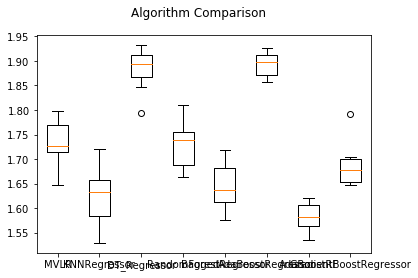

In [34]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=7,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train_2, y_train,cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Adaboost classifier with random forest as base estimator gives the less errors lets see the accuracy after appyling model.

#### logistic regression

In [36]:
logreg=LogisticRegression()
logreg.fit(X_train_2,y_train)
y_pred=logreg.predict(X_test_2)

## Model Evaluation

## Model accuracy

In [38]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.4178082191780822

#### confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[ 23,  47, 102,   0,  13,  14],
       [ 15,  84, 117,   0,  12,   7],
       [  7,  27, 257,   0,   6,  21],
       [  2,   1,  10,   0,  29,   7],
       [ 14,  22,  89,   0,  67,  29],
       [  7,  19,  44,   0,  19,  57]], dtype=int64)

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 23  47 102   0  13  14]
 [ 15  84 117   0  12   7]
 [  7  27 257   0   6  21]
 [  2   1  10   0  29   7]
 [ 14  22  89   0  67  29]
 [  7  19  44   0  19  57]]


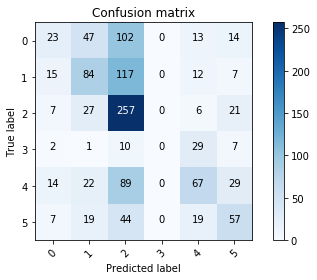

In [42]:
cnf_matrix=confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5],
                      title='Confusion matrix')

In [43]:
y_pred_prob=logreg.predict_proba(X_test_2)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=[0,1,2,3,4,5])
y_pred_prob_df.head()

,0,1,2,3,4,5
0,0.245781,0.104021,0.376136,0.019402,0.163880,0.090780
1,0.123301,0.218767,0.446361,0.033080,0.148670,0.029820
2,0.324259,0.273285,0.187959,0.015185,0.164482,0.034830
3,0.180424,0.290238,0.220816,0.070781,0.173401,0.064339
4,0.221256,0.104548,0.349714,0.024625,0.147998,0.151858


#### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(X_train_2, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [53]:
# predicting X_test
y_pred =giniDecisionTree.predict(X_test_2)

# checking for model overfit
print("Training accuracy:", accuracy_score(y_train,giniDecisionTree.predict(X_train_2)))
print("Test accuracy:", accuracy_score(y_test,y_pred))

Training accuracy: 0.40847784200385356
Test accuracy: 0.3767123287671233


####  Rondom Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
fit_rf = RandomForestClassifier(random_state=42)
fit_rf.fit(X_train_2,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
# predicting X_test
y_pred = fit_rf.predict(X_test_2)

# checking for model overfit
print("Training accuracy:", accuracy_score(y_train,fit_rf.predict(X_train_2)))
print("Test accuracy:", accuracy_score(y_test,y_pred))

Training accuracy: 0.9892956540355384
Test accuracy: 0.511986301369863


#### AdaBoostClassifier

In [56]:
ada=AdaBoostClassifier(base_estimator=fit_rf).fit(X_train_2,y_train)
y_pred=ada.predict(X_test_2)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43       199
           1       0.50      0.49      0.49       235
           2       0.58      0.83      0.68       318
           3       0.64      0.18      0.29        49
           4       0.67      0.52      0.58       221
           5       0.55      0.50      0.52       146

    accuracy                           0.56      1168
   macro avg       0.57      0.48      0.50      1168
weighted avg       0.56      0.56      0.55      1168



In [57]:
# predicting X_test
y_pred = ada.predict(X_test_2)

# checking for model overfit
print("Training accuracy:", accuracy_score(y_train,ada.predict(X_train_2)))
print("Test accuracy:", accuracy_score(y_test,y_pred))

Training accuracy: 0.9997859130807107
Test accuracy: 0.5582191780821918


### Imbalance data treatment--SMOTE (over sampling)
    - SMOTE stands for Synthetic Minority Over-sampling Technique.
    - Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes.
    - This is another alternative for solving the "class imbalance problems". 

In [73]:
#APPLYING PCA

In [60]:
X_reduced = PCA(n_components=16).fit_transform(x)

In [59]:
import imblearn

from imblearn.over_sampling import SMOTE

In [61]:
sm = SMOTE(random_state=2)
X1, y1 = sm.fit_sample(X_reduced, y)

In [62]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X1,y1,test_size=0.25,random_state=42)

### LogisticRegression

In [63]:
lr_up=LogisticRegression().fit(X_train2,y_train2)
y_pred_lr_up=lr_up.predict(X_test2)

print(classification_report(y_test2,y_pred_lr_up))

              precision    recall  f1-score   support

           0       0.23      0.09      0.12       440
           1       0.34      0.45      0.39       411
           2       0.37      0.45      0.41       431
           3       0.55      0.62      0.58       422
           4       0.39      0.24      0.30       435
           5       0.38      0.54      0.45       402

    accuracy                           0.39      2541
   macro avg       0.38      0.40      0.38      2541
weighted avg       0.38      0.39      0.37      2541



In [64]:
accuracy_score(y_test2,y_pred_lr_up)

0.39354584809130266

#### we can see after over sampling the model accuracy gone down using logistic where as before over sampling it got 42% accuracy.

In [65]:
dt_up=DecisionTreeClassifier().fit(X_train2,y_train2)
y_pred_dt_up=dt_up.predict(X_test2)

print(classification_report(y_test2,y_pred_dt_up))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54       440
           1       0.50      0.55      0.52       411
           2       0.50      0.49      0.49       431
           3       0.80      0.80      0.80       422
           4       0.61      0.56      0.58       435
           5       0.64      0.66      0.65       402

    accuracy                           0.60      2541
   macro avg       0.60      0.60      0.60      2541
weighted avg       0.60      0.60      0.60      2541



In [66]:
accuracy_score(y_test2,y_pred_dt_up)

0.5958284140102322

#### over sampling has increased the accuracy of the decision tree model to 59% from 37%.

In [67]:
rf_up=RandomForestClassifier().fit(X_train2,y_train2)
y_pred_rf_up=rf_up.predict(X_test2)

print(classification_report(y_test2,y_pred_rf_up))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       440
           1       0.56      0.58      0.57       411
           2       0.61      0.57      0.59       431
           3       0.86      0.91      0.88       422
           4       0.74      0.66      0.70       435
           5       0.76      0.76      0.76       402

    accuracy                           0.69      2541
   macro avg       0.69      0.69      0.69      2541
weighted avg       0.69      0.69      0.69      2541



In [68]:
accuracy_score(y_test2,y_pred_rf_up)

0.6855568673750492

#### random forest has incresed the acuuracy and also classifying the classes more accurately than decision tree.

In [69]:
ada_up_dt=AdaBoostClassifier(base_estimator=dt_up).fit(X_train2,y_train2)
y_pred_ada_up_dt=ada_up_dt.predict(X_test2)

print(classification_report(y_test2,y_pred_ada_up_dt))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53       440
           1       0.51      0.53      0.52       411
           2       0.51      0.48      0.50       431
           3       0.82      0.82      0.82       422
           4       0.59      0.60      0.59       435
           5       0.64      0.68      0.66       402

    accuracy                           0.60      2541
   macro avg       0.60      0.60      0.60      2541
weighted avg       0.60      0.60      0.60      2541



In [70]:
accuracy_score(y_test2,y_pred_ada_up_dt)

0.602125147579693

#### using ensemble techniques the accuracy has increased as the algorithm mainly focuses on miss classifiers and learn their patterns of occcurances.

In [71]:
ada_up_rf=AdaBoostClassifier(base_estimator=rf_up).fit(X_train2,y_train2)
y_pred_ada_up_rf=ada_up_rf.predict(X_test2)

print(classification_report(y_test2,y_pred_ada_up_rf))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       440
           1       0.64      0.65      0.64       411
           2       0.64      0.68      0.66       431
           3       0.93      0.92      0.92       422
           4       0.76      0.73      0.74       435
           5       0.76      0.83      0.79       402

    accuracy                           0.74      2541
   macro avg       0.74      0.74      0.74      2541
weighted avg       0.74      0.74      0.74      2541



In [72]:
accuracy_score(y_test2,y_pred_ada_up_rf)

0.7406532861078315

#### finally we can say adaboost classifier with random forest as the base esmitaor with over sampling has given the highest accuracy of 74% where as we see our base model gave the accuracy of 39%.

# Overview of the Approach

1) The data set has 42 features and 5839 observations with the target column of 6 classes [0-5]

2) the target class was imbalanced so, i compared models with both imabalanced data and then balanced data (SMOTE)

3) As there are many features to decide our target column i applied various feature selection techniques
    -forward selection
    -Recurrsive feature elimination
    -using correlation
    -statiscal approach can be done but due to high dimensions i skipped it but we can use chisqaure test to know the significance.

4) The feature selection techniques doesnt work well as there is heavy loss of information due to which model is unable to predict.

5) To over come the dimentionality problem i have used PCA(Principle component analysis) and before applying it we need to scale the data as pca is a distance based method.

6) After applying PCA with 16 components i could cover 95% of the data like it was a best technique to capture maximum data with less features.

7) I have used k-fold cross validation with various model in it at a time passed the independent and dependant variables and with different performance measuring metrics Adaboost with base estimator gave best results.

8) I have performed logistic ,decision tree,random forest, ada boost algorithms in predicting ffrom these adaboost gave highest accuracy of 55% .this is with imbalanced data.

9) After doing imbalance treatment using SMOTE (over sampling) most the models performed well .

10) highest accuracy with best scores in all metrics is from Adaboost classifierof 74% accuracy and Precision, recall was very high which makes model to learn hidden patterns to define each class.